# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [4]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

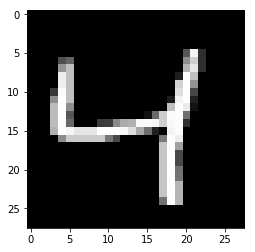

In [6]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [18]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

placShape = (None, mnist.train.images.shape[1])

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=placShape)
targets_ = tf.placeholder(tf.float32, shape=placShape)

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(
    labels=targets_,
    logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [19]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [20]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6948
Epoch: 1/20... Training loss: 0.6918
Epoch: 1/20... Training loss: 0.6888
Epoch: 1/20... Training loss: 0.6854
Epoch: 1/20... Training loss: 0.6817
Epoch: 1/20... Training loss: 0.6768
Epoch: 1/20... Training loss: 0.6704
Epoch: 1/20... Training loss: 0.6644
Epoch: 1/20... Training loss: 0.6563
Epoch: 1/20... Training loss: 0.6459
Epoch: 1/20... Training loss: 0.6342
Epoch: 1/20... Training loss: 0.6220
Epoch: 1/20... Training loss: 0.6068
Epoch: 1/20... Training loss: 0.5933
Epoch: 1/20... Training loss: 0.5772
Epoch: 1/20... Training loss: 0.5558
Epoch: 1/20... Training loss: 0.5398
Epoch: 1/20... Training loss: 0.5195
Epoch: 1/20... Training loss: 0.5040
Epoch: 1/20... Training loss: 0.4865
Epoch: 1/20... Training loss: 0.4678
Epoch: 1/20... Training loss: 0.4521
Epoch: 1/20... Training loss: 0.4303
Epoch: 1/20... Training loss: 0.4183
Epoch: 1/20... Training loss: 0.4019
Epoch: 1/20... Training loss: 0.3887
Epoch: 1/20... Training loss: 0.3777
E

Epoch: 1/20... Training loss: 0.2004
Epoch: 1/20... Training loss: 0.1977
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1991
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1972
Epoch: 1/20... Training loss: 0.1991
Epoch: 1/20... Training loss: 0.1984
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1987
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1941
E

Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1591
E

Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1322
E

Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1220
E

Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1085
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1185
E

Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1075
E

Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.0992
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1039
E

Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1019
E

Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0996
E

Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0944
E

Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0955
E

Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0908
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0902
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.1010
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0889
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0897
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0884
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0878
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0889
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0874
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0879
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

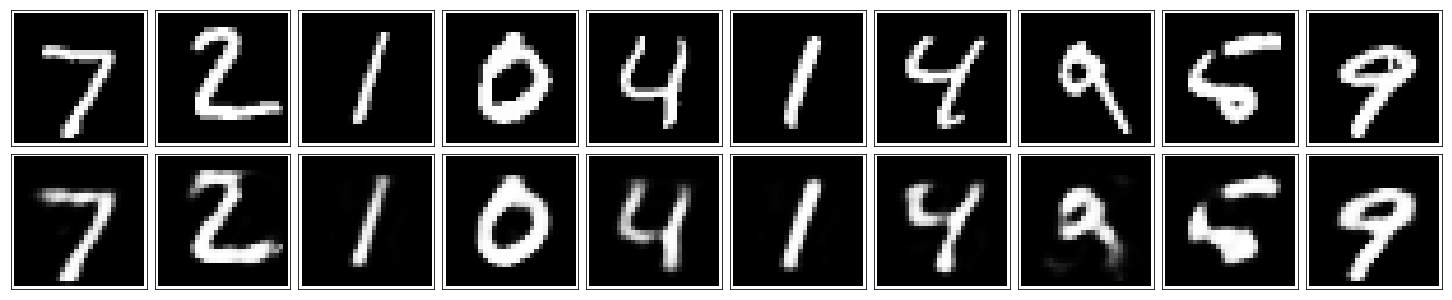

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [22]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.